In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

%matplotlib inline

In [4]:
# Import Dataset
df = pd.read_csv("../input/train.csv", delimiter = ",")
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


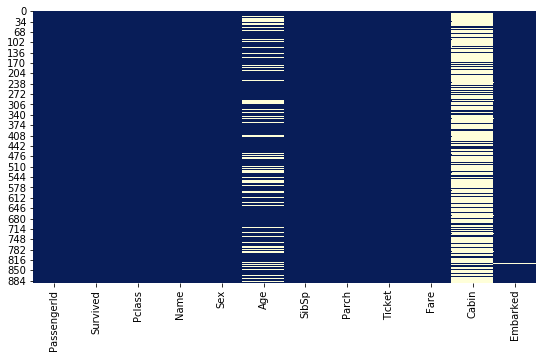

In [5]:
# Missing Values

fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

In [6]:
# we can delete "Name, ID, Ticket and Cabin" parameters
df.drop(["PassengerId", "Name","Ticket", "Cabin"], axis = 1, inplace = True) # Drop 

In [7]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
list(df.columns)

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [9]:
df.info() # we have missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


# EDA

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [11]:
df['Survived'].value_counts() * 100 / len(df)

0    61.616162
1    38.383838
Name: Survived, dtype: float64

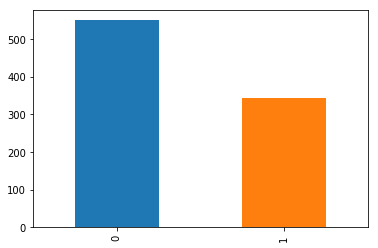

In [12]:
df['Survived'].value_counts().plot(kind='bar')
plt.show()

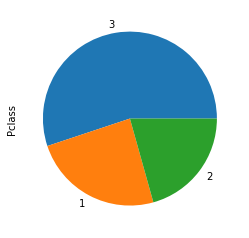

In [13]:
df['Pclass'].value_counts().plot(kind='pie')
plt.show()

In [14]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [15]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

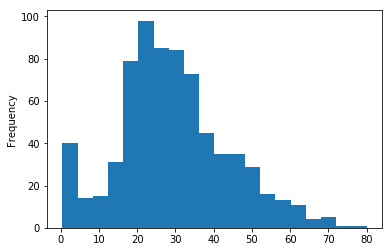

In [16]:
df.Age.plot(kind='hist', bins=20);

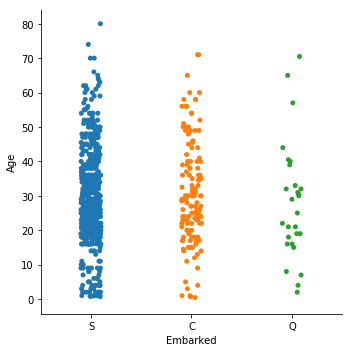

In [17]:
# Embarked - Age
sns.catplot(x="Embarked",y="Age", data = df); 

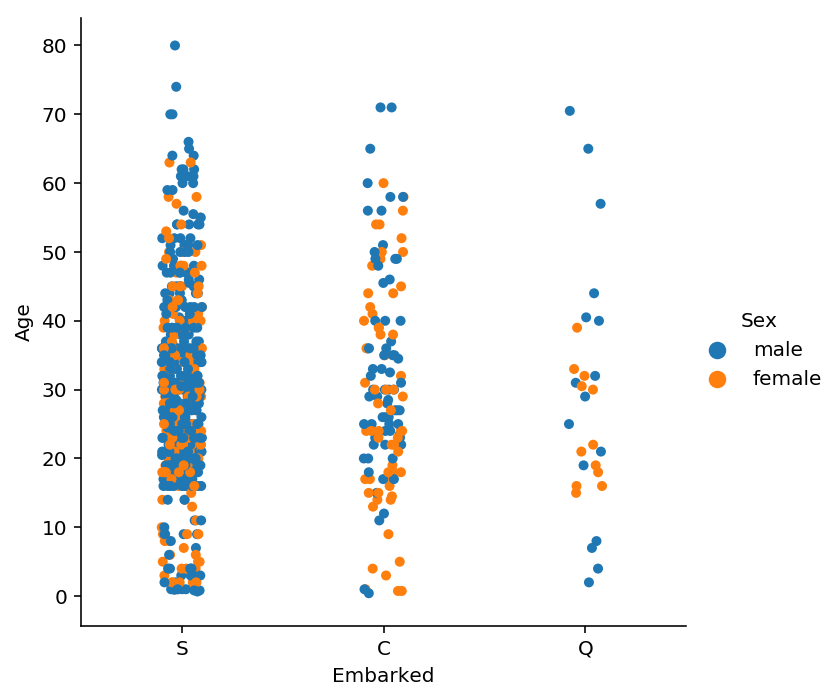

In [18]:
%config InlineBackend.figure_format = "retina"
sns.catplot(x="Embarked",y="Age", data = df, hue = "Sex");

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


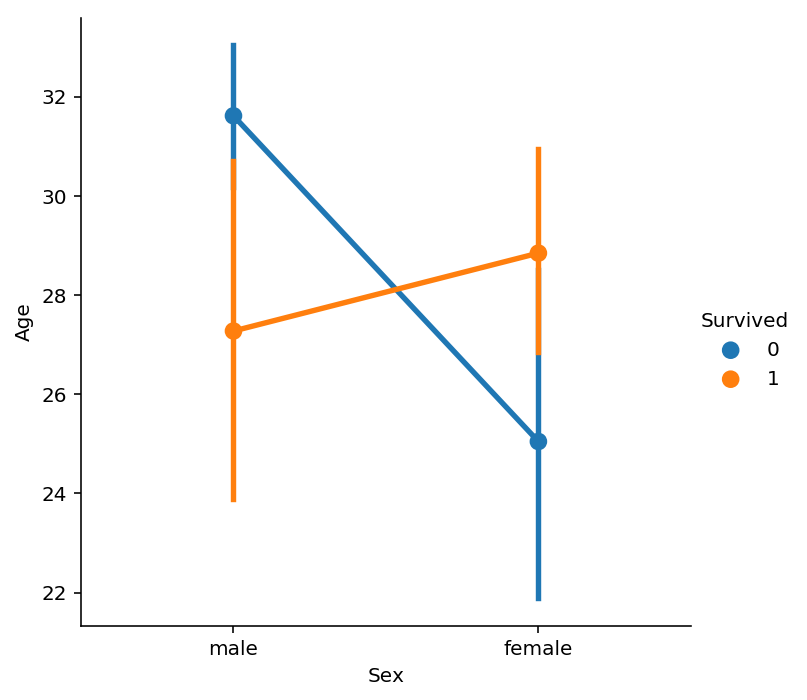

In [19]:
sns.catplot(x = "Sex", y = "Age", hue = "Survived", kind = "point", data = df);

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


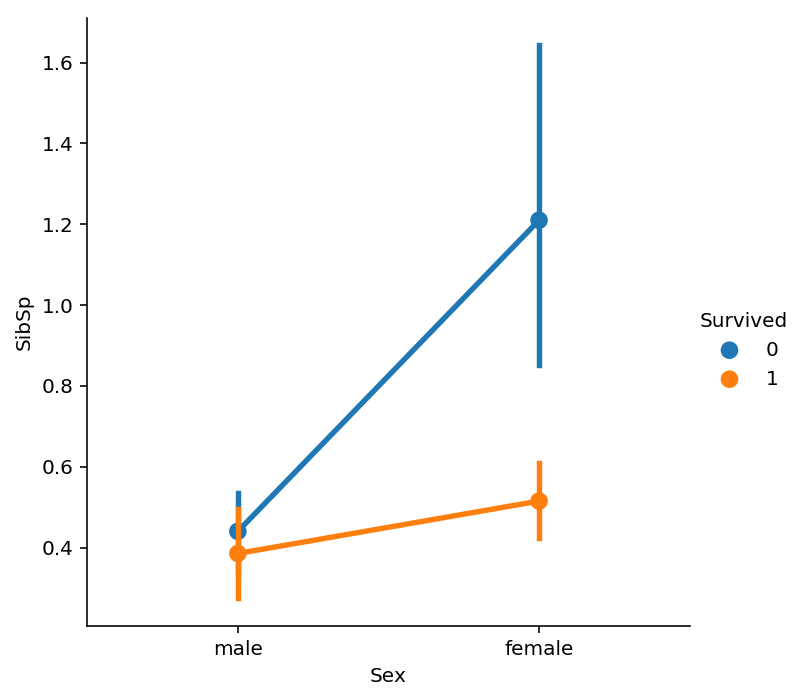

In [20]:
sns.catplot(x = "Sex", y = "SibSp", hue = "Survived", kind = "point", data = df);

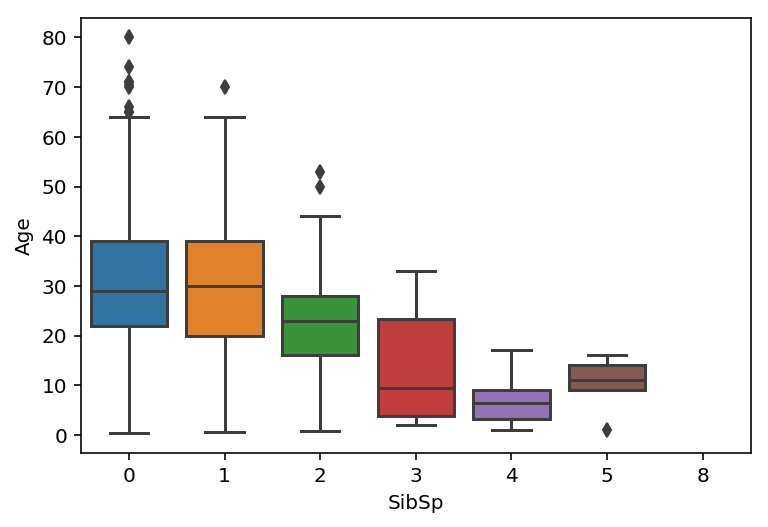

In [21]:
sns.boxplot("SibSp","Age", data = df);

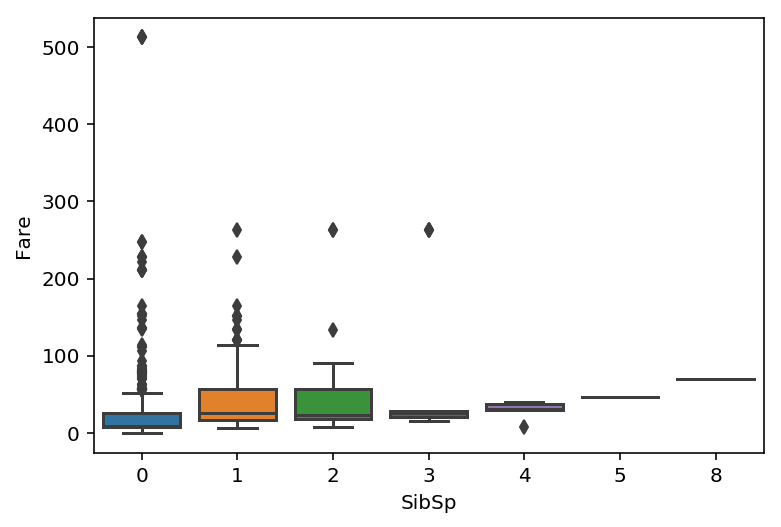

In [22]:
sns.boxplot("SibSp","Fare", data = df);

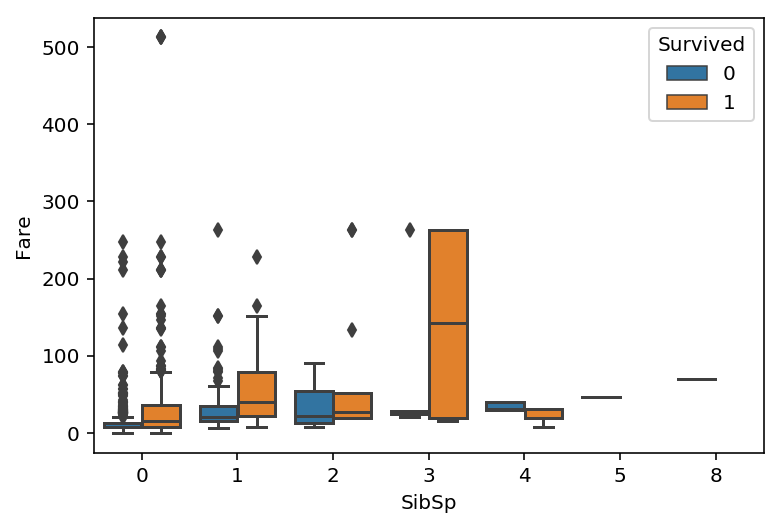

In [23]:
sns.boxplot("SibSp","Fare", hue = "Survived",data = df);

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


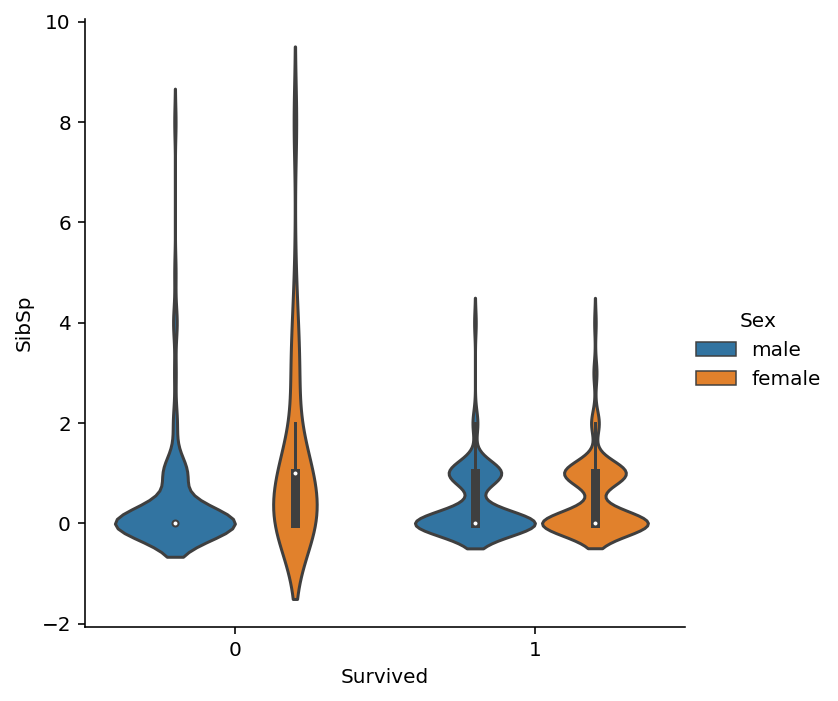

In [24]:
sns.catplot("Survived","SibSp", kind = "violin", hue = "Sex", data = df);

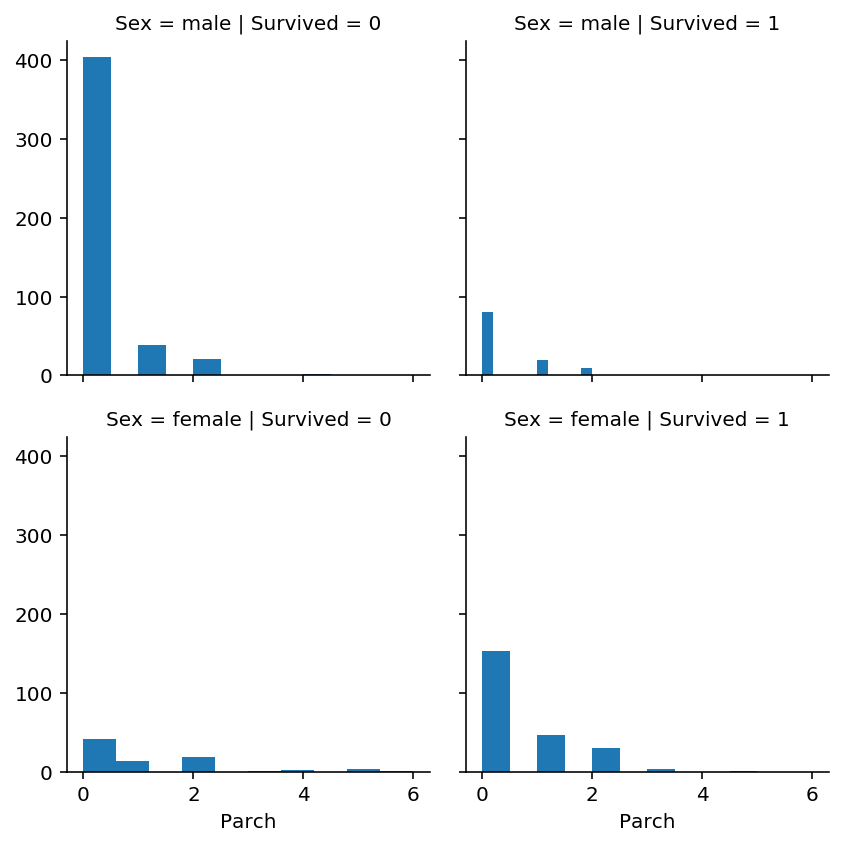

In [25]:
g = sns.FacetGrid(data = df, row = "Sex", col = "Survived")
g.map(plt.hist, "Parch");

In [26]:
print(pd.isnull(df).sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


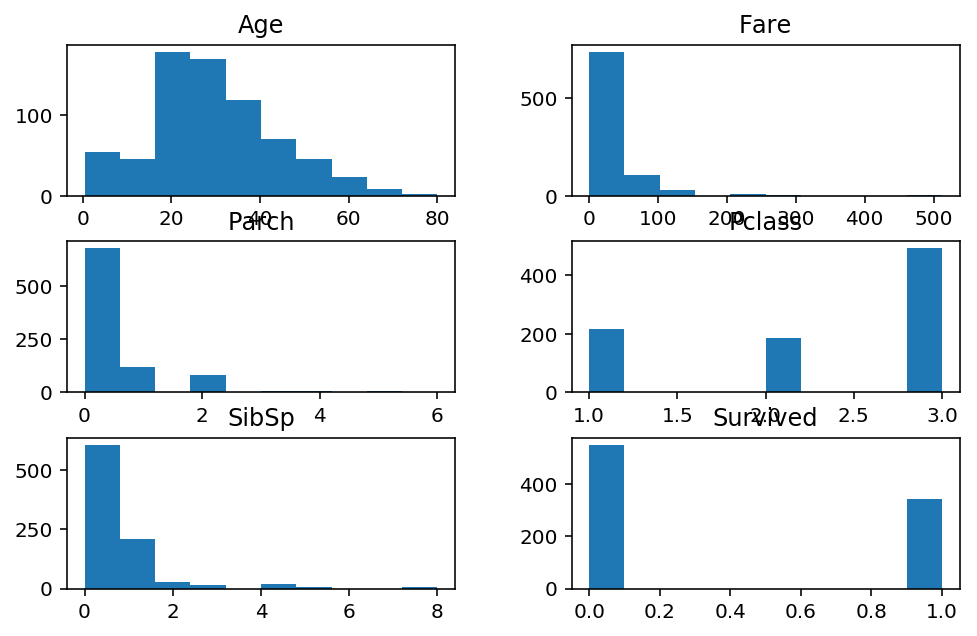

In [27]:
df.hist(bins=10,figsize=(8,5),grid=False);

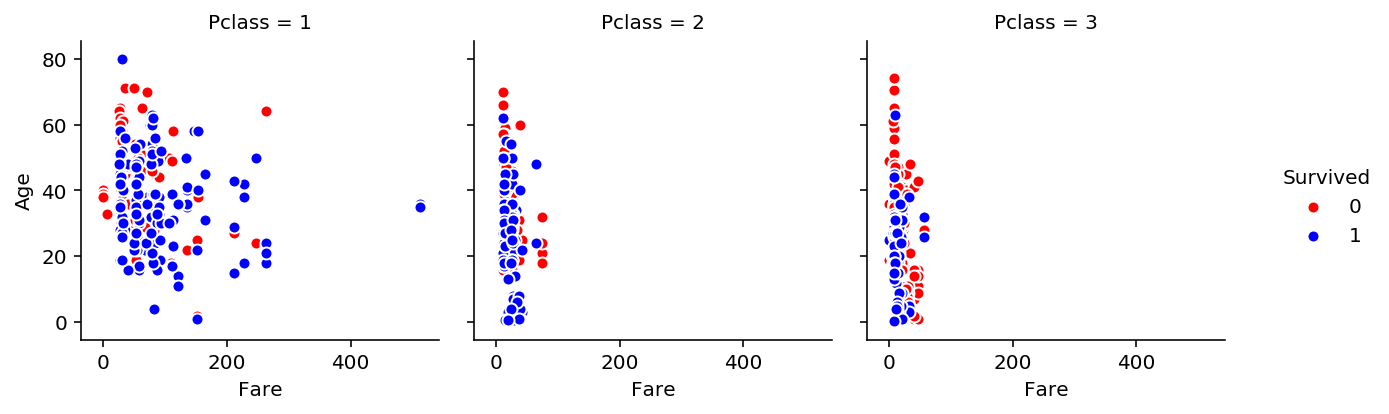

In [28]:
g = sns.FacetGrid(df, hue="Survived", col="Pclass", margin_titles=True,palette={1:"blue", 0:"red"})
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend();

In [29]:
df.corr()["Survived"]

Survived    1.000000
Pclass     -0.338481
Age        -0.077221
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Name: Survived, dtype: float64

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


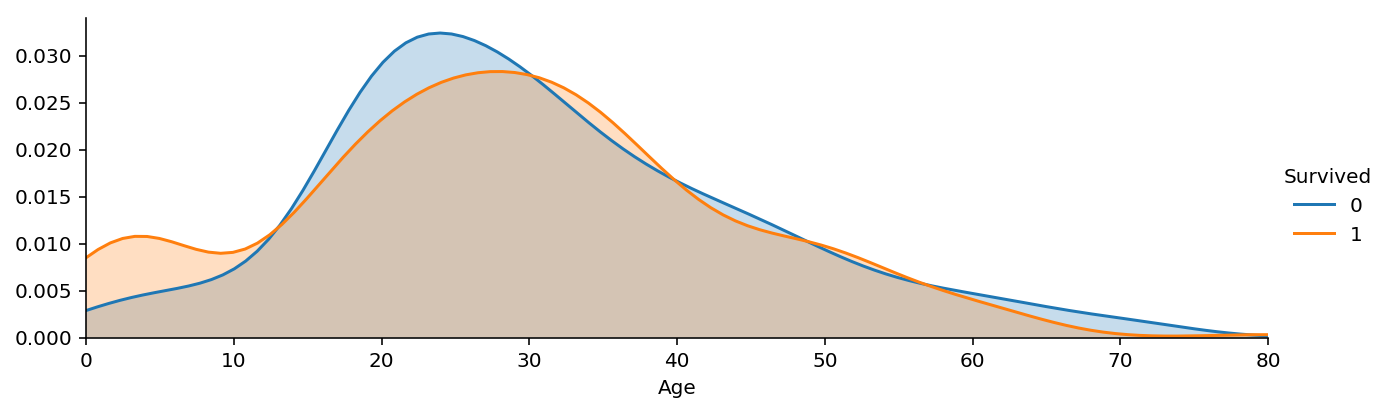

In [31]:
g = sns.FacetGrid(df, hue = 'Survived', aspect=3)
g.map(sns.kdeplot, 'Age', shade= True )
g.set(xlim=(0 , df['Age'].max()))
g.add_legend();

# Label Encoder

In [32]:
from sklearn.preprocessing import LabelEncoder

labelencoder_Sex = LabelEncoder()
df.Sex = labelencoder_Sex.fit_transform(df.Sex)

In [33]:
df.Embarked = df["Embarked"].astype("str")

labelencoder_Embarked = LabelEncoder()
df.Embarked = labelencoder_Embarked.fit_transform(df.Embarked)

In [36]:
# Missing Value Imputation for "Age" Parameter
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
df["Age"] = imputer.fit_transform(df["Age"].values.reshape(-1,1))
df = df.dropna(how = "all")

In [37]:
XX= df.iloc[:,1:].values
XX.shape

(891, 7)

In [38]:
y = df.iloc[:,0].values
y.shape

(891,)

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
XX = scaler.fit_transform(XX)

In [40]:
XX[:5]

array([[ 0.82737724,  0.73769513, -0.56573646,  0.43279337, -0.47367361,
        -0.50244517,  0.58111394],
       [-1.56610693, -1.35557354,  0.66386103,  0.43279337, -0.47367361,
         0.78684529, -1.93846038],
       [ 0.82737724, -1.35557354, -0.25833709, -0.4745452 , -0.47367361,
        -0.48885426,  0.58111394],
       [-1.56610693, -1.35557354,  0.4333115 ,  0.43279337, -0.47367361,
         0.42073024,  0.58111394],
       [ 0.82737724,  0.73769513,  0.4333115 , -0.4745452 , -0.47367361,
        -0.48633742,  0.58111394]])

In [41]:
y[:12]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1])

# Model
## Test-Train

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.25, random_state=14)

In [43]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(668, 7)
(223, 7)
(668,)
(223,)


In [44]:
from sklearn.neighbors import KNeighborsClassifier

# KNN model

classifier = KNeighborsClassifier(n_neighbors=9, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

In [45]:
y_pred = classifier.predict(X_test)
predictions = pd.DataFrame(data=y_pred,    # values
                index=range(len(y_pred)),    # 1st column as index
                   columns=['y_pred'])  # 1st row as the column names

predictions['y_test'] = y_test
predictions.head()

,y_pred,y_test
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0


In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(cm)

[[122  17]
 [ 26  58]]


In [47]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy: % {:10.2f}".format(accuracy*100)) 

Accuracy: %      80.72


## Best Neighbors Number

In [48]:
accuracy_list = []
k_list = []

for k in range(2,10):
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)
    k_list.append(k)
    print("{} için accuracy: {:10.2f}".format(k,accuracy))

2 için accuracy:       0.79
3 için accuracy:       0.80
4 için accuracy:       0.79
5 için accuracy:       0.79
6 için accuracy:       0.80
7 için accuracy:       0.81
8 için accuracy:       0.80
9 için accuracy:       0.81


In [54]:
test = pd.read_csv("../input/test.csv", delimiter = ",")

In [55]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [56]:
test.drop(["PassengerId", "Name","Ticket", "Cabin"], axis = 1, inplace = True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        417 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 22.9+ KB


In [57]:
imputer = SimpleImputer(strategy="median")
test["Age"] = imputer.fit_transform(test["Age"].values.reshape(-1,1))
test = test.dropna(how = "all")


imputer = SimpleImputer(strategy="median")
test["Fare"] = imputer.fit_transform(test["Fare"].values.reshape(-1,1))
test = test.dropna(how = "all")

In [58]:
labelencoder_Sex = LabelEncoder()
test.Sex = labelencoder_Sex.fit_transform(test.Sex)


test.Embarked = df["Embarked"].astype("str")

labelencoder_Embarked = LabelEncoder()
test.Embarked = labelencoder_Embarked.fit_transform(test.Embarked)

In [60]:
XY_test= test.values
scaler = StandardScaler()
XY_test = scaler.fit_transform(XY_test)
XY_test[:10]

array([[ 0.87348191,  0.75592895,  0.38623105, -0.49947002, -0.4002477 ,
        -0.49741333,  0.59944756],
       [ 0.87348191, -1.32287566,  1.37137004,  0.61699237, -0.4002477 ,
        -0.51227801, -1.90624325],
       [-0.31581919,  0.75592895,  2.55353683, -0.49947002, -0.4002477 ,
        -0.46410047,  0.59944756],
       [ 0.87348191,  0.75592895, -0.20485235, -0.49947002, -0.4002477 ,
        -0.48247516,  0.59944756],
       [ 0.87348191, -1.32287566, -0.59890794,  0.61699237,  0.61989583,
        -0.4174915 ,  0.59944756],
       [ 0.87348191,  0.75592895, -1.2293969 , -0.49947002, -0.4002477 ,
        -0.47239149, -0.65339784],
       [ 0.87348191, -1.32287566,  0.03158101, -0.49947002, -0.4002477 ,
        -0.50099864,  0.59944756],
       [-0.31581919,  0.75592895, -0.28366347,  0.61699237,  0.61989583,
        -0.11789443,  0.59944756],
       [ 0.87348191, -1.32287566, -0.91415242, -0.49947002, -0.4002477 ,
        -0.50816925,  0.59944756],
       [ 0.87348191,  0.7559

In [61]:
classifier.predict(XY_test)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
# test = pd.read_csv("../input/test.txt", delimiter = ",")
# test.drop(["Name","Ticket", "Cabin", "Pclass","Sex","Age","SibSp","Parch","Ticket","Fare","Embarked"], axis = 1, inplace = True)
# test["Survived"] = classifier.predict(XY_test)
# test.to_csv("sonuc.csv", index = False, header = True)

